# What makes a TED Talk great? 

For the last 15 years, TED has gained tremendous traction on the web to reach millions through its insightful content from experts in all backgrounds. But what makes a TED Talk great? In this analysis, I look at outcomes and the variables that contribute to those outcomes. 

The metrics I use as successful outcomes are views count and number of comments. 

The variables that I explore are duration of the video, speaker's occupation, time of year the video was filmed and published, and associated tags.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Gather source data set from TED. 
df = pd.read_csv('ted_main.csv')

# List out the columns to understand data.
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [2]:
# Structure data by columns in this order.
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

# Change dates to a readable format. 
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%m-%d-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%m-%d-%Y'))

## Does the length of a video affect outcomes?

In the first section, I explore duration as the first variable. First, I decided to create two scatter plots: one to compare between duration and views and another to compare duration and comments. 

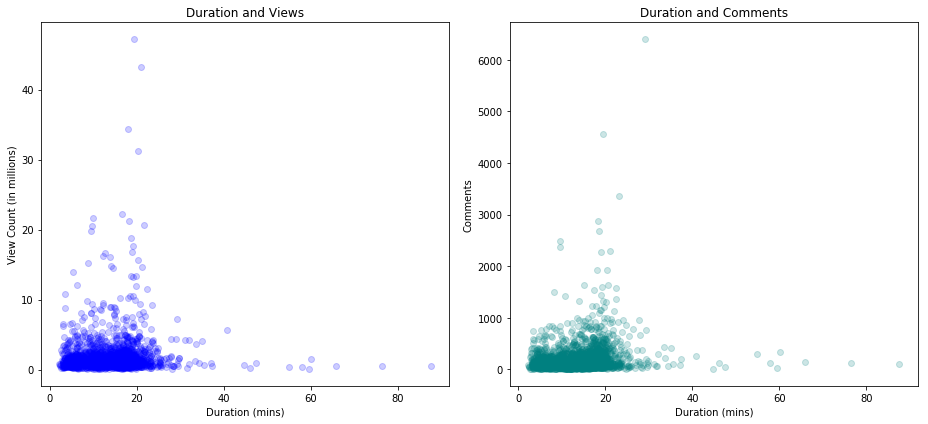

In [3]:
# Set the dimensions for the chart.
plt.figure(figsize=(13, 6))

# Create two scatter plots. The first one compares duration to views.
plt.subplot(1, 2, 1)
plt.scatter(x=df['duration']/60, y=df['views']/1000000, color='blue', alpha=.2)
plt.title('Duration and Views')
plt.ylabel('View Count (in millions)')
plt.xlabel('Duration (mins)')

# Create second scatter plot that compares duration to comments. 
plt.subplot(1, 2, 2)
plt.scatter(x=df['duration']/60, y=df['comments'], color='teal', alpha=.2)
plt.title('Duration and Comments')
plt.ylabel('Comments')
plt.xlabel('Duration (mins)')

# Print the scatter plots. 
plt.tight_layout()
plt.show()

It appears that the length of TED Talks does not affect outcomes significantly. This is great news for a TED speaker because it means he or she does not have to compromise quality of content for time. By viewing the graphs, there are some insights to observe:

1) While there isn't a clear range for the ideal duration of a TED Talk video, the sweet spot appears to be between 10 to 30 minutes. All of the successful videos, defined by view counts and comments, are within that range in duration.

2) There are some outliers in the same range of 10 to 30 minutes as well. 

3) Videos longer that 40 minutes do not attract many views and comments.  

In the next section, I explore the shape of the distribution of duration and provide summary statistics.

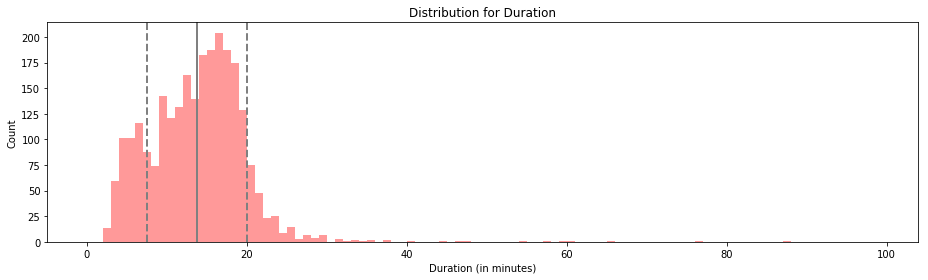

In [4]:
# Set dimensions for the chart.
plt.figure(figsize=(13, 4))

# Create histogram to observe if it has a normal distribution.
plt.hist(x=df['duration']/60, color='red', bins=np.arange(0, 100), alpha=.4)
plt.title('Distribution for Duration')
plt.ylabel('Count')
plt.xlabel('Duration (in minutes)')

# Add a vertical line at the mean.
plt.axvline((df['duration']/60).mean(), color='gray', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline((df['duration']/60).mean() + (df['duration']/60).std(), color='gray', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline((df['duration']/60).mean() - (df['duration']/60).std(), color='gray', linestyle='dashed', linewidth=2) 

# Print the histogram.
plt.tight_layout()
plt.show()

In [5]:
# Print the summary statistics.
(df['duration']/60).describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

The majority (68%) of talks are between 7.5 minutes and 20.0  minutes long. But what about those outliers videos? How many of them are out there? What is the range of duration amongst those videos?  

## What do widely successful TED Talks have in common? 

In this section, I continue exploring the questions above. How many outlier videos are out there in terms of views? And what are the common variables do these videos have in common? 

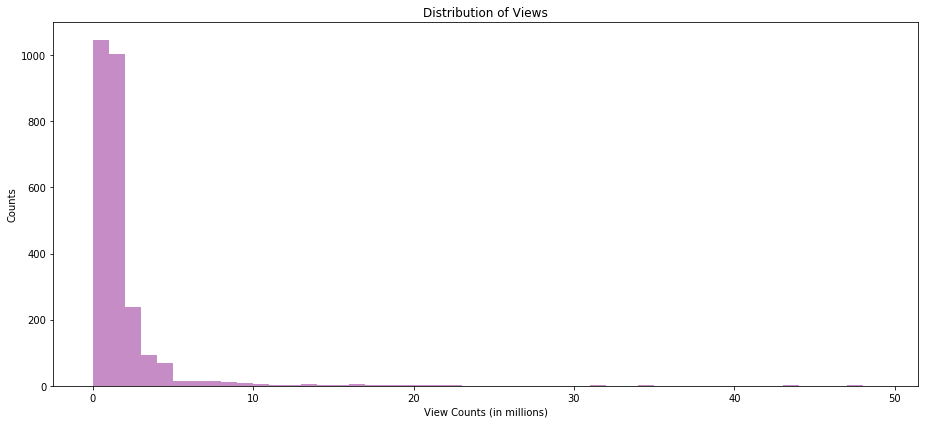

In [6]:
# Set dimensions for the chart.
plt.figure(figsize=(13, 6))

# Create histogram for distribution of views. 
plt.hist(df['views']/1000000, bins=np.arange(0, 50), color='purple', alpha =.45)
plt.title('Distribution of Views')
plt.xlabel('View Counts (in millions)')
plt.ylabel('Counts')

# Print the histogram.
plt.tight_layout()
plt.show()

In the histogram above, it is clear that the majority of videos received less than 10 million views. It also appears from the histogram above that there are a few outlier videos that received more than 20 million views. Let's explore how many there are.

In [7]:
# Set initial count to zero.
count = 0

# Loop across views to count how many videos have more than 20 million views. 
for view in df['views']:
    if view/1000000 > 20:
        count += 1

# Print total count.         
print(count)

9


After counting the videos with more than 20 million views, we find out there are **9** total. 

### How widely successful are these videos? 

Let's explore summary statistics for views to understand the dataset. 

In [8]:
(df['views']/1000000).describe()

count    2550.000000
mean        1.698297
std         2.498479
min         0.050443
25%         0.755793
50%         1.124524
75%         1.700759
max        47.227110
Name: views, dtype: float64

On average, a TED Talk video receives 1.69 million views. And with the standard deviation being 2.50 million views, each video over 20 million views is widely successful. 

### Are there common patterns amongst these 9 widely successful videos? 
What insights can we gain from these patterns on what makes a TED talk successful?

In [9]:
# Set a table with the top 9 most viewed videos.
df[['title', 'duration', 'main_speaker','speaker_occupation', 'published_date', 'views']].sort_values('views', ascending=False).head(9)

,title,duration,main_speaker,speaker_occupation,published_date,views
0,Do schools kill creativity?,1164,Ken Robinson,Author/educator,06-26-2006,47227110
1346,Your body language may shape who you are,1262,Amy Cuddy,Social psychologist,10-01-2012,43155405
677,How great leaders inspire action,1084,Simon Sinek,Leadership expert,05-04-2010,34309432
837,The power of vulnerability,1219,Brené Brown,Vulnerability researcher,12-23-2010,31168150
452,10 things you didn't know about orgasm,1003,Mary Roach,Writer,05-19-2009,22270883
1776,How to speak so that people want to listen,598,Julian Treasure,Sound consultant,06-27-2014,21594632
201,My stroke of insight,1099,Jill Bolte Taylor,Neuroanatomist,03-11-2008,21190883
5,Why we do what we do,1305,Tony Robbins,Life coach; expert in leadership psychology,06-27-2006,20685401
2114,This is what happens when you reply to spam email,588,James Veitch,Comedian and writer,01-08-2016,20475972


From the table above, it does not appear that there are common characteristics amongst a widely successful TED Talk (i.e. videos with more than 20 million views). This goes back to the point that for a TED Talk, content is king. Regardless of what background you have, at TED, there will be an audience as long as your content has substance. 

*How do I get summary stats for duration for this slice of the dataset?  

*One area I would like to explore is the tags associated with each video listed above. How would I be able to loop through the tags to see if there are commonalities in the topics associate with these videos that attract the most views? See below. 

## What associated tags do most viewed TED Talks have in common?

In [10]:
#Set a table with the tags listed. 
df[['title', 'tags', 'views']].sort_values('views', ascending=False).head(9)

,title,tags,views
0,Do schools kill creativity?,"['children', 'creativity', 'culture', 'dance',...",47227110
1346,Your body language may shape who you are,"['body language', 'brain', 'business', 'psycho...",43155405
677,How great leaders inspire action,"['TEDx', 'business', 'entrepreneur', 'leadersh...",34309432
837,The power of vulnerability,"['TEDx', 'communication', 'culture', 'depressi...",31168150
452,10 things you didn't know about orgasm,"['books', 'culture', 'history', 'humor', 'scie...",22270883
1776,How to speak so that people want to listen,"['culture', 'sound', 'speech']",21594632
201,My stroke of insight,"['biology', 'brain', 'consciousness', 'global ...",21190883
5,Why we do what we do,"['business', 'culture', 'entertainment', 'goal...",20685401
2114,This is what happens when you reply to spam email,"['comedy', 'communication', 'curiosity', 'humo...",20475972


*How do I isolate the tags of just the top 9 videos and loop through to count how many times each tags were mentioned? 

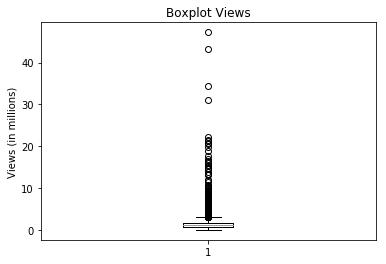

In [11]:
plt.boxplot(df['views']/1000000)
plt.title('Boxplot Views')
plt.ylabel('Views (in millions)')

plt.show()

## **Conclusion** 

For TED Talks with top 9 most views, the variables explored does not significantly contribute towards outcomes. This probably speaks to the importance of substantial content in TED talk videos and the opportunity the platform brings to connect with a wide-ranging audience regardless of background.

However, further analysis is needed. The next step in this research would be to look at the tag associated analysis to see if certain themese come up more frequently than others for most viewed videos. Also, doing a network analysis to see which videos are related with one another would be interesting to analyze how being related to one video may influence the traffic in another. 

Finally, it is important to note that the variable analysis done above was primarily for top 9 most viewed videos. For analysis conducted with the whole dataset, results on correlation between the variables explored and outcomes may provide different results than the one provided in this conclusion.